<a href="https://colab.research.google.com/github/SyedSihabUsSakib/Thesis/blob/master/MNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read dataset

In [ ]:
import pandas as pd

# assume that your dataset is stored in a CSV file named 'dataset.csv'
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

# assume that the text data is stored in a column named 'text'
X = data['text']

# assume that the class labels are stored in a column named 'label'
y = data['label']


#Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# dataset path
# path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/thesis/'

#**MNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# assume that you have already loaded your dataset into two lists: X (text) and y (class labels)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

# create a CountVectorizer object to convert the text data into numerical features
vectorizer = CountVectorizer()

# fit the vectorizer on the training data and transform the training and testing data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# create a Multinomial Naive Bayes classifier and fit it to the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# predict the class labels for the testing data
y_pred = clf.predict(X_test)

# evaluate the performance of the classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

   Cy-Flaming       0.59      0.58      0.58       119
Cy-Pull-a-Pig       0.65      0.65      0.65        88
    Cy-Racism       0.68      0.65      0.67       133
    Cy-Threat       0.55      0.56      0.55        96
 Not Bullying       0.71      0.74      0.73       115

     accuracy                           0.64       551
    macro avg       0.64      0.64      0.64       551
 weighted avg       0.64      0.64      0.64       551



#Confusion Matrix **MNB**

[[69 13 18 10  9]
 [16 57  4  5  6]
 [10  4 54 17 11]
 [16  7 15 87  8]
 [ 6  7  8  9 85]]


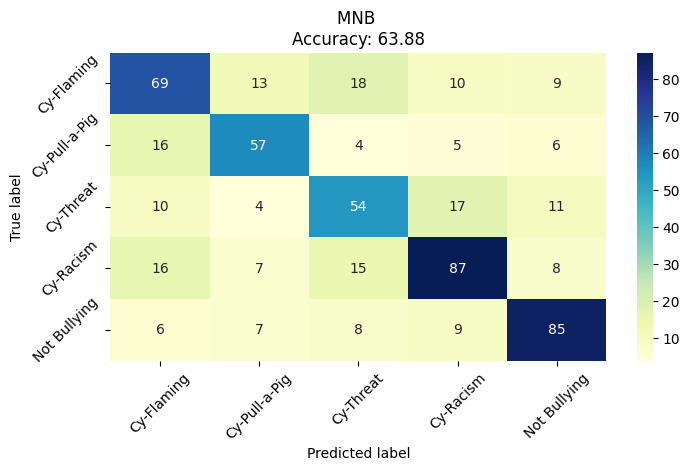

In [ ]:
#generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=['Cy-Flaming', 'Cy-Pull-a-Pig', 'Cy-Threat', 'Cy-Racism', 'Not Bullying'])
print(cm)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'], 
                     columns = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'],)

plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('MNB \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#ROC

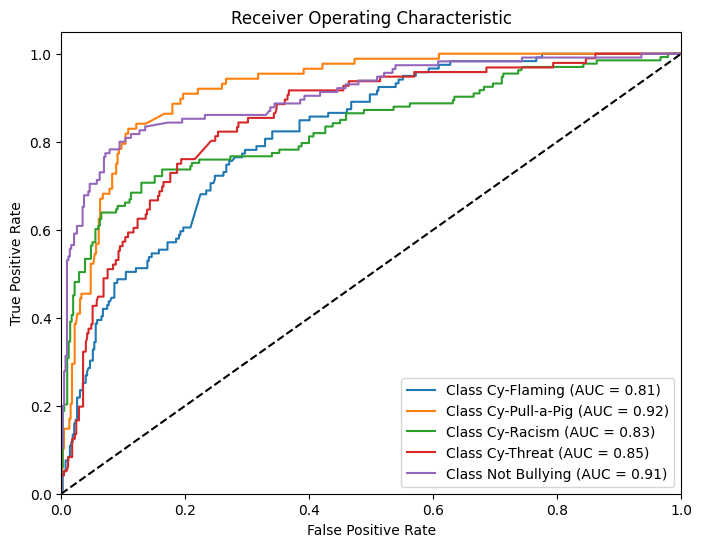

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

# Create a CountVectorizer object to convert the text data into numerical features
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training and testing data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier and fit it to the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
probs = clf.predict_proba(X_test)

# Calculate the number of classes
num_classes = len(clf.classes_)

# Create an array to store the FPR and TPR for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    # Prepare the target labels for the current class
    target_label = (y_test == clf.classes_[i]).astype(int)
    
    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(target_label, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class %s (AUC = %0.2f)' % (clf.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
